# Entornos de data science con Python.

Ejercicio realizado por Araceli Macía Barrado.

## Parte 1

**En esta primera parte trabajaremos con datos de cotización de Bitcoin.**

### 1.1. Lectura de datos
1) Obtén de coindex los datos de al menos tres exchanges como ficheros CSV separados
para al menos un período de un año. 

=> He descargado un fichero de la pagina http://www.coindesk.com/price/ desde Julio 2015 a Julio 2016


In [1]:
import pandas as pd
import numpy as np

In [2]:
datosCoinDesk = pd.read_csv("coindesk-bpi-USD.csv", header=0, names=["fecha","priceEx1"], index_col=False)
datosCoinDesk.head()



,fecha,priceEx1
0,2015-07-01 00:00:00,257.66
1,2015-07-02 00:00:00,254.35
2,2015-07-03 00:00:00,255.60
3,2015-07-04 00:00:00,260.35
4,2015-07-05 00:00:00,271.02


In [3]:

datosCoinDesk["fecha"]= pd.DatetimeIndex(datosCoinDesk.fecha).normalize()

In [4]:
datosCoinDesk.head()

,fecha,priceEx1
0,2015-07-01,257.66
1,2015-07-02,254.35
2,2015-07-03,255.60
3,2015-07-04,260.35
4,2015-07-05,271.02


Voy a realizar dos copias del DataSet cargado. Y luego modificaré el valor de los dos nuevos Dataset, sumandole una serie de valores aleatorios.

In [5]:
datosExchange2 = pd.DataFrame(data=datosCoinDesk, copy="TRUE")
datosExchange3 = pd.DataFrame(data=datosCoinDesk, copy="TRUE")
datosExchange2.priceEx1 = datosExchange2.priceEx1 + pd.Series(np.random.randn(datosExchange2.index.size))
datosExchange2 =datosExchange2.rename(columns = {'priceEx1':'priceEx2'})
datosExchange3.priceEx1 = datosExchange3.priceEx1 + pd.Series(np.random.randn(datosExchange3.index.size))
datosExchange3 =datosExchange3.rename(columns = {'priceEx1':'priceEx3'})
DatosTotal = datosCoinDesk.merge(datosExchange2, how="outer")
DatosTotal = DatosTotal.merge(datosExchange3, how="outer")


In [21]:
DatosTotal.head()
print DatosTotal.shape
print DatosTotal.duplicated('fecha').unique() # hay valores duplicados
DatosTotal=DatosTotal.drop_duplicates('fecha')
print DatosTotal.shape #Dimension despues de borrar.


(367, 4)
[False]
(367, 4)


In [22]:
DatosTotal = DatosTotal.set_index("fecha")

- Ya tengo el DataSet con los datos de todos los ficheros, y con la columna fecha de indice.

In [23]:
DatosTotal.info()
DatosTotal.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2015-07-01 to 2016-07-02
Data columns (total 3 columns):
priceEx1    367 non-null float64
priceEx2    367 non-null float64
priceEx3    367 non-null float64
dtypes: float64(3)
memory usage: 11.5 KB


,priceEx1,priceEx2,priceEx3
fecha,,,
2015-07-01,257.66,258.876739,257.352937
2015-07-02,254.35,255.225896,255.031916


### 1.3. Procesamiento


• **Obtén los día de máximo y mínimo valor de cotización **

Primero miro a ver cual son los datos maximos y minimos a nivel de DataSet, y luego lo busco con operaciones de filtrado.

In [49]:
print DatosTotal.max() #Visualizo los valores maximo de cada columna, para ver los datos y comprobar el resultado.
#indMax= DatosTotal.max()[DatosTotal.max() == DatosTotal.max(axis=1).max()].index
#indMax=indMax[0] #nombre de la columna que tiene el valor mayor
#DatosTotal[DatosTotal[indMax]==DatosTotal[indMax].max()]

print "el valor maximo es ", DatosTotal[["priceEx1","priceEx2","priceEx3"]].max().max()
print "el indice maximo es", DatosTotal[["priceEx1","priceEx2","priceEx3"]].max().argmax()




priceEx1    768.240000
priceEx2    768.456277
priceEx3    767.848986
p3_01         2.691008
p3_02         4.662819
p2_01         3.395737
dtype: float64
el valor maximo es  768.456276932
el indice maximo es priceEx2


In [53]:
print DatosTotal.min() #Visualizo los valores minimos de cada columna, para ver los datos y comprobar el resultado.
#indmin= DatosTotal.min()[DatosTotal.min() == DatosTotal.min(axis=1).min()].index
#indmin=indmin[0] #nombre de la columna que tiene el menor mayor
#DatosTotal[DatosTotal[indmin]==DatosTotal[indmin].min()]


print "el valor minimo es ", DatosTotal[["priceEx1","priceEx2","priceEx3"]].min().min()
print "el indice minimo es", DatosTotal[["priceEx1","priceEx2","priceEx3"]].min().argmin()


priceEx1    2.000000
priceEx2    1.920009
priceEx3    1.456005
p3_01       0.001909
p3_02       0.001083
p2_01       0.000028
dtype: float64
el valor minimo es  1.45600453897
el indice minimo es priceEx3


* **un gráfico con la media móvil (“rolling mean”) simple (https://en.wikipedia.org/wiki/Moving_average) de los valores de una de las series (puedes probar con varios valores de n). Nota: La media móvil puede encontrarse implementada en alguna biblioteca, no hace falta calcularla programando.**

Calculo la media movil simple de los datos que tiene el valor exchange. Con un periocidad de 1.

In [57]:
DtRolMean=DatosTotal.priceEx1.rolling(min_periods=30,window=30,center=False).mean()
DtRolMean=pd.DataFrame(DtRolMean)
DtRolMean=DtRolMean.dropna()

print DtRolMean.head(3)

              priceEx1
fecha                 
2015-07-30  278.533667
2015-07-31  279.409667
2015-08-01  280.266000


In [27]:
%matplotlib inline


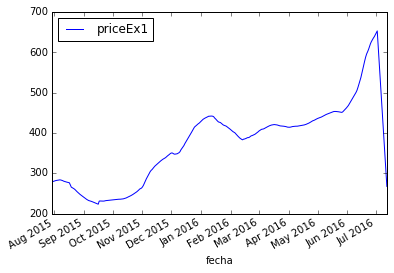

In [28]:
DtRolMean.plot()

* **Obtén el máximo “spread” (diferencia para el mismo día en los diferentes exchanges)
del precio de bitcoin**

In [29]:
p3_01=abs(DatosTotal.priceEx3 - DatosTotal.priceEx1)
p3_02=abs(DatosTotal.priceEx3 - DatosTotal.priceEx2)
p2_01=abs(DatosTotal.priceEx2 - DatosTotal.priceEx1)

In [30]:
DatosTotal["p3_01"]=p3_01
DatosTotal["p3_02"]=p3_02
DatosTotal["p2_01"]=p2_01
DatosTotal.head(3)


,priceEx1,priceEx2,priceEx3,p3_01,p3_02,p2_01
fecha,,,,,,
2015-07-01,257.66,258.876739,257.352937,0.307063,1.523802,1.216739
2015-07-02,254.35,255.225896,255.031916,0.681916,0.193981,0.875896
2015-07-03,255.60,257.544104,255.302481,0.297519,2.241623,1.944104


Ahora tengo el DataFrame con la diferencia en valor absoluto de la diferencia entre los precios por dia.

Calculo el valor maximo de las columnas, para luego mostrar la fila que tenga dicho valor, que correspondera con el dia en que la diferencia entre los valores fue mayor.

In [96]:
data_aux=DatosTotal[["p3_01","p3_02","p2_01"]]
print data_aux.head(2)

maxValor=DatosTotal[["p3_01","p3_02","p2_01"]].max().max()
VarMaxValor=DatosTotal[["p3_01","p3_02","p2_01"]].max().argmax()

print "el máximo spread  es de ", maxValor
print "lo tiene : ", VarMaxValor

#DatosTotal.ix[DatosTotal[VarMaxValor]== DatosTotal[VarMaxValor].max()]
DatosTotal.ix[DatosTotal[VarMaxValor]== maxValor]



               p3_01     p3_02     p2_01
fecha                                   
2015-07-01  0.307063  1.523802  1.216739
2015-07-02  0.681916  0.193981  0.875896
el máximo spread  es de  4.66281862266
lo tiene :  p3_02


,priceEx1,priceEx2,priceEx3,p3_01,p3_02,p2_01
fecha,,,,,,
2015-10-08,242.69,246.085737,241.422919,1.267081,4.662819,3.395737


En la visualizacion del dataframe de los datos, se puede ver cuales son las fechas, donde la diferencia de precio entre las cotizaciones fue mayor. 

*  **calcular el “spread medio” para todo el periodo.**

In [97]:
SpreadMedio=DatosTotal.iloc[0:, 3:6].mean().mean()
print "el Spread Medio es :" , SpreadMedio

el Spread Medio es : 0.890727748911


Ahora vamos a comprobar paso a paso que la instruccion es correcta.

In [98]:
DatosTotal.iloc[0:, 3:6].head(1) #Solo cojo los datos de las columnas que contienen la diferencia de precios.

,p3_01,p3_02,p2_01
fecha,,,
2015-07-01,0.307063,1.523802,1.216739


In [99]:
DatosTotal.iloc[0:, 3:6].mean() #Obtengo la media de cada columna

p3_01    0.774294
p3_02    1.118711
p2_01    0.779178
dtype: float64

In [100]:
DatosTotal.iloc[0:, 3:6].mean().mean() #obtengo la media del DataFrame de medias.

0.8907277489112787

* **Crea gráficos que los comparen dos a dos, y que muestren con alguna indicación
gráfica (por ejemplo, un punto de otro color) los días de mayor “spread”. Pista: puedes
obtener un subconjunto del dataframe solo con estos días y dibujarlo como si fuese
otra serie diferente**

In [101]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')


--- > Creo 3 graficos, para comparar dos a dos.

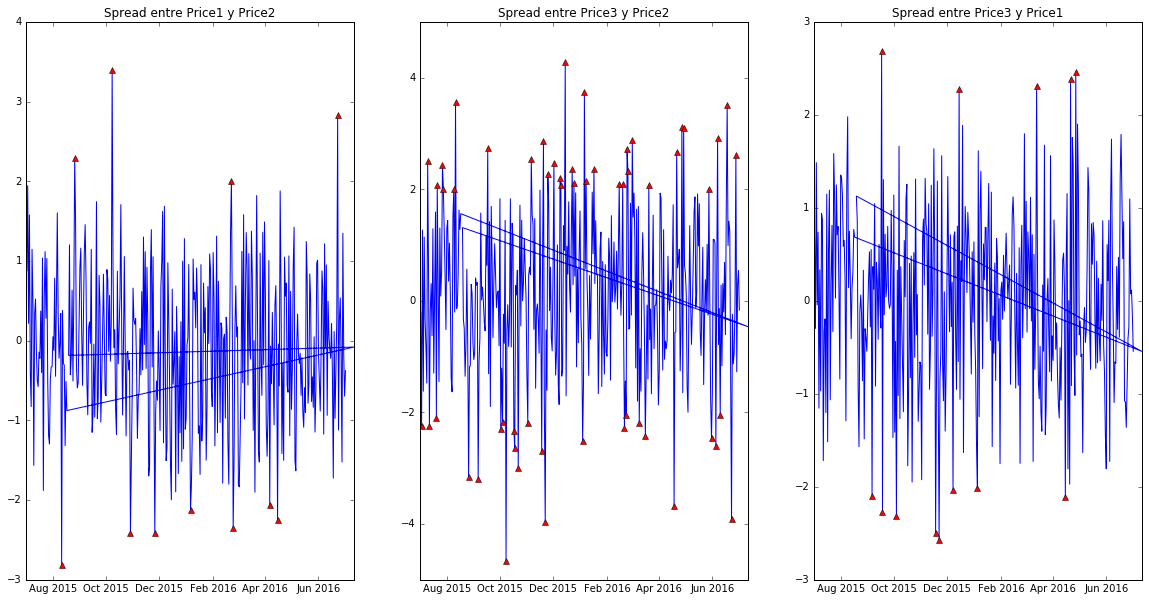

In [102]:

plt.rcParams["figure.figsize"] = [20,10]

plt.subplot(131) 

d1=DatosTotal.priceEx2 - DatosTotal.priceEx1
d3=pd.DataFrame(d1,columns = {'v1'})
d2=d3[d3.v1<-2]
d3=d3[d3.v1>2]
l1=plt.plot(d1)
plt.setp(l1, color="b")
l2=plt.plot(d2,'r^')
plt.setp(l2, color="r")
l3=plt.plot(d3,'r^')
plt.setp(l3, color="r")
plt.title("Spread entre Price1 y Price2")

#############################################
plt.subplot(132) 
d1=DatosTotal.priceEx3 - DatosTotal.priceEx2
d3=pd.DataFrame(d1,columns = {'v1'})
d2=d3[d3.v1<-2]
d3=d3[d3.v1>2]
l1=plt.plot(d1)
plt.setp(l1, color="b")
l2=plt.plot(d2,'r^')
plt.setp(l2, color="r")
l3=plt.plot(d3,'r^')
plt.setp(l3, color="r")
plt.title("Spread entre Price3 y Price2")

#############################################
plt.subplot(133) 
d1=DatosTotal.priceEx3 - DatosTotal.priceEx1
d3=pd.DataFrame(d1,columns = {'v1'})
d2=d3[d3.v1<-2]
d3=d3[d3.v1>2]
l1=plt.plot(d1)
plt.setp(l1, color="b")
l2=plt.plot(d2,'r^')
plt.setp(l2, color="r")
l3=plt.plot(d3,'r^')
plt.setp(l3, color="r")
plt.title("Spread entre Price3 y Price1")